# Supervised Learning Model Evaluation Lab

Complete the exercises below to solidify your knowledge and understanding of supervised learning model evaluation.

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

## Regression Model Evaluation

In [2]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data = pd.read_csv('housing.csv', header=None, delimiter=r"\s+", names=column_names)

In [3]:
"""
CRIM - per capita crime rate by town
ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
INDUS - proportion of non-retail business acres per town.
CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
NOX - nitric oxides concentration (parts per 10 million)
RM - average number of rooms per dwelling
AGE - proportion of owner-occupied units built prior to 1940
DIS - weighted distances to five Boston employment centres
RAD - index of accessibility to radial highways
TAX - full-value property-tax rate per $10,000
PTRATIO - pupil-teacher ratio by town
B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
LSTAT - % lower status of the population
MEDV - Median value of owner-occupied homes in $1000's"""

"\nCRIM - per capita crime rate by town\nZN - proportion of residential land zoned for lots over 25,000 sq.ft.\nINDUS - proportion of non-retail business acres per town.\nCHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)\nNOX - nitric oxides concentration (parts per 10 million)\nRM - average number of rooms per dwelling\nAGE - proportion of owner-occupied units built prior to 1940\nDIS - weighted distances to five Boston employment centres\nRAD - index of accessibility to radial highways\nTAX - full-value property-tax rate per $10,000\nPTRATIO - pupil-teacher ratio by town\nB - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town\nLSTAT - % lower status of the population\nMEDV - Median value of owner-occupied homes in $1000's"

In [4]:
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


## 1. Split this data set into training (80%) and testing (20%) sets.

The `MEDV` field represents the median value of owner-occupied homes (in $1000's) and is the target variable that we will want to predict.

In [5]:
# Your code here :
from sklearn.model_selection import train_test_split

X = data.drop('MEDV', axis=1)
y = data['MEDV']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((404, 13), (102, 13), (404,), (102,))

## 2. Train a `LinearRegression` model on this data set and generate predictions on both the training and the testing set.

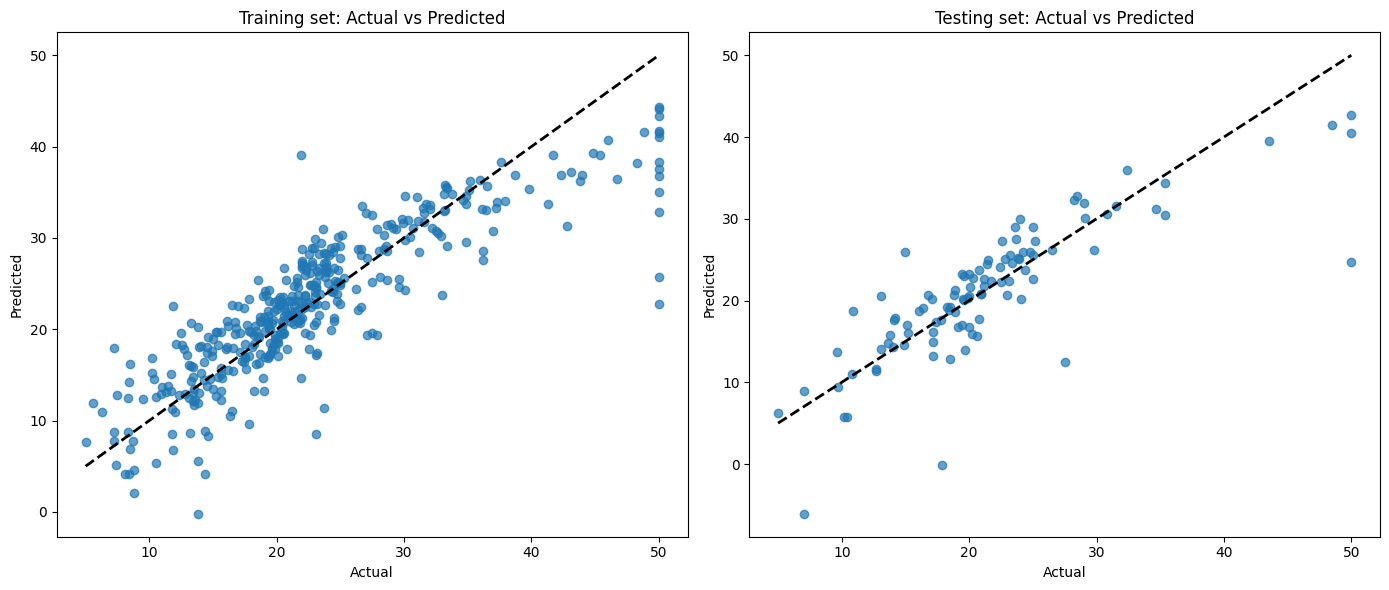

In [12]:
# Your code here :
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

model = LinearRegression()

model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)

y_test_pred = model.predict(X_test)

# Visualize the predictions
plt.figure(figsize=(14, 6))

# Training set
plt.subplot(1, 2, 1)
plt.scatter(y_train, y_train_pred, alpha=0.7)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Training set: Actual vs Predicted')

# Testing set
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_test_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Testing set: Actual vs Predicted')

plt.tight_layout()
plt.show()


## 3. Calculate and print R-squared for both the training and the testing set.

In [9]:
#Your code here : 
r2_train = model.score(X_train, y_train)

r2_test = model.score(X_test, y_test)

print(f'R-squared for training set: {r2_train}')
print(f'R-squared for testing set: {r2_test}')

R-squared for training set: 0.7508856358979672
R-squared for testing set: 0.668759493535633


## 4. Calculate and print mean squared error for both the training and the testing set.

In [14]:
# Your code here :
from sklearn.metrics import mean_squared_error

mse_train = mean_squared_error(y_train, y_train_pred)

mse_test = mean_squared_error(y_test, y_test_pred)

print(f'Mean Squared Error for training set: {mse_train}')
print(f'Mean Squared Error for testing set: {mse_test}')

Mean Squared Error for training set: 21.641412753226316
Mean Squared Error for testing set: 24.291119474973442


## 5. Calculate and print mean absolute error for both the training and the testing set.

In [15]:
# Your code here :
from sklearn.metrics import mean_absolute_error

mae_train = mean_absolute_error(y_train, y_train_pred)

mae_test = mean_absolute_error(y_test, y_test_pred)

print(f'Mean Absolute Error for training set: {mae_train}')
print(f'Mean Absolute Error for testing set: {mae_test}')

Mean Absolute Error for training set: 3.3147716267832266
Mean Absolute Error for testing set: 3.1890919658878323


## Classification Model Evaluation

In [16]:
from sklearn.datasets import load_iris

data = load_iris()

In [17]:
print(data.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [18]:
column_names = data.feature_names

In [19]:
df = pd.DataFrame(data['data'],columns=column_names)

In [20]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [21]:
target = pd.DataFrame(data.target)

In [22]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [23]:
data['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

## 6. Split this data set into training (80%) and testing (20%) sets.

The `class` field represents the type of flower and is the target variable that we will want to predict.

In [24]:
# Your code here :
from sklearn.model_selection import train_test_split

X_classification = df
y_classification = target

X_train_classification, X_test_classification, y_train_classification, y_test_classification = train_test_split(X_classification, y_classification, test_size=0.2, random_state=42)

X_train_classification.shape, X_test_classification.shape, y_train_classification.shape, y_test_classification.shape

((120, 4), (30, 4), (120, 1), (30, 1))

## 7. Train a `LogisticRegression` model on this data set and generate predictions on both the training and the testing set.

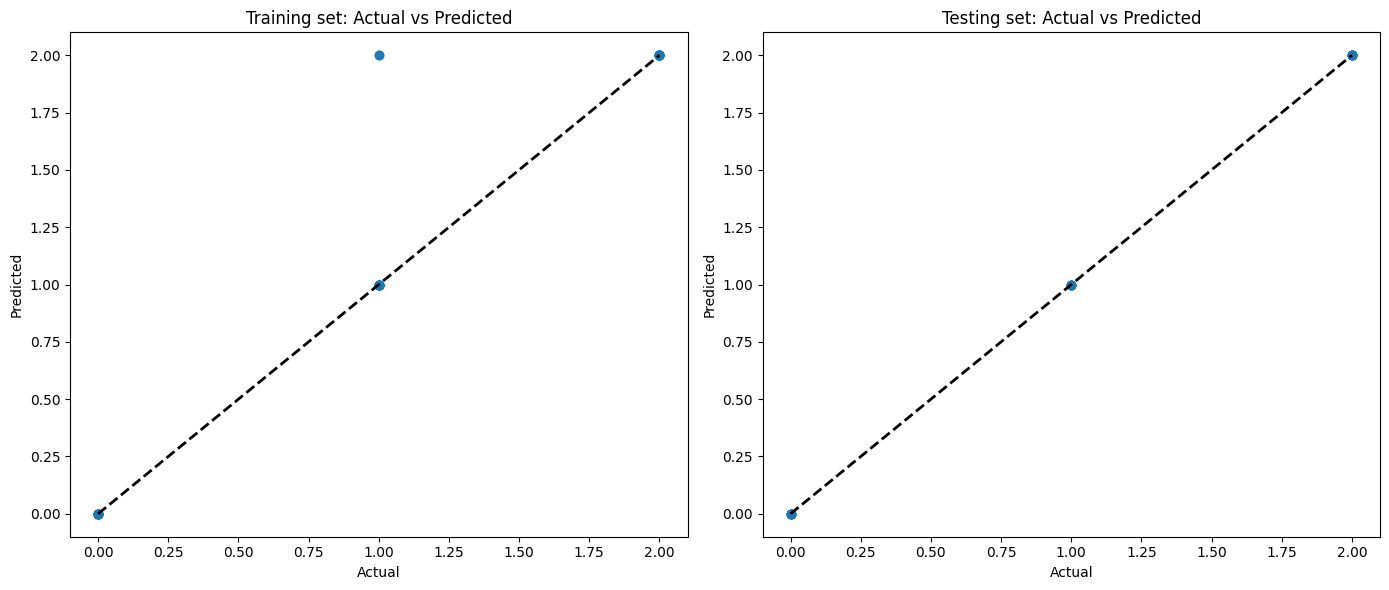

In [28]:
# Your code here :
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

logistic_model = LogisticRegression(max_iter=200)

logistic_model.fit(X_train_classification, y_train_classification.values.ravel())

y_train_classification_pred = logistic_model.predict(X_train_classification)

y_test_classification_pred = logistic_model.predict(X_test_classification)

# Visualize the predictions

plt.figure(figsize=(14, 6))

# Training set
plt.subplot(1, 2, 1)
plt.scatter(y_train_classification, y_train_classification_pred, alpha=0.7)
plt.plot([y_train_classification.min(), y_train_classification.max()], [y_train_classification.min(), y_train_classification.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Training set: Actual vs Predicted')

# Testing set
plt.subplot(1, 2, 2)
plt.scatter(y_test_classification, y_test_classification_pred, alpha=0.7)
plt.plot([y_test_classification.min(), y_test_classification.max()], [y_test_classification.min(), y_test_classification.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Testing set: Actual vs Predicted')

plt.tight_layout()
plt.show()






## 8. Calculate and print the accuracy score for both the training and the testing set.

In [29]:
# Your code here :
from sklearn.metrics import accuracy_score

accuracy_train = accuracy_score(y_train_classification, y_train_classification_pred)

accuracy_test = accuracy_score(y_test_classification, y_test_classification_pred)

print(f'Accuracy for training set: {accuracy_train}')
print(f'Accuracy for testing set: {accuracy_test}')


Accuracy for training set: 0.975
Accuracy for testing set: 1.0


## 9. Calculate and print the balanced accuracy score for both the training and the testing set.

In [39]:
# Your code here :
from sklearn.metrics import balanced_accuracy_score

balanced_accuracy_train = balanced_accuracy_score(y_train_classification, y_train_classification_pred)

balanced_accuracy_test = balanced_accuracy_score(y_test_classification, y_test_classification_pred)

print(f'Balanced Accuracy for training set: {balanced_accuracy_train}')
print(f'Balanced Accuracy for testing set: {balanced_accuracy_test}')


Balanced Accuracy for training set: 0.975609756097561
Balanced Accuracy for testing set: 1.0


## 10. Calculate and print the precision score for both the training and the testing set.

In [40]:
# Your code here :
from sklearn.metrics import precision_score

precision_train = precision_score(y_train_classification, y_train_classification_pred, average='weighted')

precision_test = precision_score(y_test_classification, y_test_classification_pred, average='weighted')

print(f'Precision for training set: {precision_train}')
print(f'Precision for testing set: {precision_test}')


Precision for training set: 0.9767857142857144
Precision for testing set: 1.0


## 11. Calculate and print the recall score for both the training and the testing set.

In [37]:
# Your code here :
from sklearn.metrics import recall_score

recall_train = recall_score(y_train_classification, y_train_classification_pred, average='weighted')

recall_test = recall_score(y_test_classification, y_test_classification_pred, average='weighted')

print(f'Recall for training set: {recall_train}')
print(f'Recall for testing set: {recall_test}')


Recall for training set: 0.975
Recall for testing set: 1.0


## 12. Calculate and print the F1 score for both the training and the testing set.

In [42]:
# Your code here :
from sklearn.metrics import f1_score

f1_train = f1_score(y_train_classification, y_train_classification_pred, average='micro')

f1_test = f1_score(y_test_classification, y_test_classification_pred, average='micro')

print(f'F1 score for training set: {f1_train}')
print(f'F1 score for testing set: {f1_test}')

F1 score for training set: 0.975
F1 score for testing set: 1.0


## 13. Generate confusion matrices for both the training and the testing set.

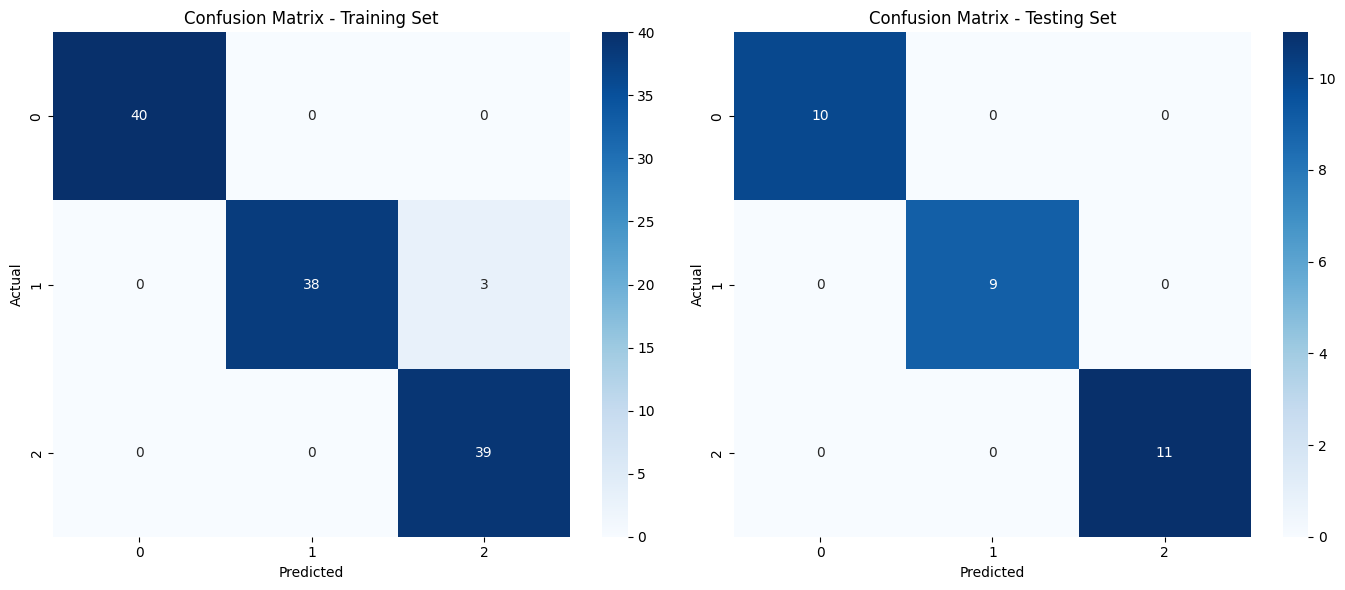

In [34]:
# Your code here :
from sklearn.metrics import confusion_matrix
import seaborn as sns

conf_matrix_train = confusion_matrix(y_train_classification, y_train_classification_pred)

conf_matrix_test = confusion_matrix(y_test_classification, y_test_classification_pred)

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.heatmap(conf_matrix_train, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Training Set')

plt.subplot(1, 2, 2)
sns.heatmap(conf_matrix_test, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Testing Set')

plt.tight_layout()
plt.show()

## Bonus: For each of the data sets in this lab, try training with some of the other models you have learned about, recalculate the evaluation metrics, and compare to determine which models perform best on each data set.

In [26]:
# Have fun here !